[![GitHub issues by-label](https://img.shields.io/github/issues-raw/pfebrer/sisl/GeometryPlot?style=for-the-badge)](https://github.com/pfebrer/sisl/labels/GeometryPlot)

    
    
GeometryPlot
=========

In [1]:
import sisl
import sisl.viz
import numpy as np

First of all, we will create a geometry to work with

In [2]:
geom = sisl.geom.graphene_nanoribbon(9)

`GeometryPlot` allows you to quickly visualize a geometry. You can create a `GeometryPlot` out of a geometry very easily:

In [3]:
# GeometryPlot is the default plot of a geometry, so one can just do
plot = geom.plot()

Now let's see what we got:

In [4]:
plot

FigureWidget({
    'data': [{'line': {'color': 'gray', 'coloraxis': 'coloraxis', 'width': 15},
              '…

## Plotting in 3D, 2D and 1D

The 3D view is great, but for big geometries it can take some time to render. If we have a 2d material, a 2D view might be more practical instead. We can get it by specifying the axes that we want:

In [5]:
plot.update_settings(axes="xy")

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

The next section goes more in depth on what the `axes` setting accepts. The important part for now is that asking for two axes gets you a 2D representation. Samewise, asking for 1 axis gets you a 1D representation:

In [6]:
plot.update_settings(axes="x")

FigureWidget({
    'data': [{'marker': {'color': array(['grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey'…

Notice how asking for a 1D representation leaves the Y axis of the plot at your disposal. You can control the values in the second axis using the `dataaxis_1d` setting.

It can be an array that **explicitly sets the values**:

In [7]:
plot.update_settings(axes="x", dataaxis_1d=plot.geometry.atoms.Z)

FigureWidget({
    'data': [{'marker': {'color': array(['grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey'…

Or a function that **accepts the projected coordinates and returns the values**.

In [8]:
plot.update_settings(dataaxis_1d=np.sin)

FigureWidget({
    'data': [{'marker': {'color': array(['grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey'…

Asking for three axes would bring us back to the 3D representation:

In [9]:
plot.update_settings(axes="xyz")

FigureWidget({
    'data': [{'line': {'color': 'gray', 'coloraxis': 'coloraxis', 'width': 15},
              '…

Specifying the axes
----------

There are many ways in which you may want to display the coordinates of your geometry. The most common one is to display the cartesian coordinates. You indicate that you want cartesian coordinates by passing `(+-){"x", "y", "z"}`. You can pass them as a list: 

In [10]:
plot.update_settings(axes=["x", "y"])

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

But it is usually more convenient to pass them as a multicharacter string:

In [11]:
plot.update_settings(axes="xy")

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

Notice that you can order axes in any way you want. The first one will go to the X axis of the plot, and the second to the Y axis:

In [12]:
plot.update_settings(axes="yx")

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

You are not limited to cartesian coordinates though. Passing `(+-){"a", "b", "c"}` will display the fractional coordinates:

In [13]:
plot.update_settings(axes="ab")

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

And you can also pass an **arbitrary direction** as an axis: 

In [14]:
plot.update_settings(axes=[[1,1,0], [1, -1, 0]])

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

In this case, we have projected the coordinates into the `[1,1,0]` and `[1, -1, 0]` directions. Notice that the modulus of the vector is important for the scaling. See for example what happens when we scale the second vector by a factor of two:

In [15]:
plot.update_settings(axes=[[1,1,0], [2, -2, 0]])

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

Finally, you can even mix the different possibilities!

In [16]:
plot.update_settings(axes=["x", [1,1,0]])

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

To summarize the different possibilities:

- `(+-){"x", "y", "z"}`: The **cartesian coordinates** are displayed.
- `(+-){"a", "b", "c"}`: The **fractional coordinates** are displayed. Same for {0,1,2}.
- `np.array of shape (3, )`: The coordinates are **projected into that direction**. If two directions are passed, the coordinates are not projected to each axis separately. The displayed coordinates are then the coefficients of the linear combination to get that point (or the projection of that point into the plane formed by the two axes).

<div class="alert alert-warning">
    
Some non-obvious behavior
    
**Fractional coordinates are only displayed if all axes are lattice vectors**. Otherwise, the plot works as if you had passed the direction of the lattice vector. Also, for now, the **3D representation only displays cartesian coordinates**.

</div>

## 2D perspective

It is not trivial to notice that the **axes you choose determine what is your point of view**. For example, if you choose to view `"xy"`, the `z` axis will be pointing "outside of the screen", while if you had chosen `"yx"` the `z` axis will point "inside the screen". This affects the depth of the atoms, i.e. **which atoms are on top and which are on the bottom**.

To visualize it, we build a bilayer of graphene and boron nitride:

In [17]:
bilayer = sisl.geom.bilayer(top_atoms="C", bottom_atoms=["B", "N"], stacking="AA")

If we want to see the `"xy"` axes, we would be viewing the structure from the top:

In [18]:
bilayer.plot(axes="xy")

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

but if we set the axes to `yx`, `-xy` or `x-y`, we will see it from the bottom:

In [19]:
bilayer.plot(axes="-xy")

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

That is, we are flipping the geometry. In the above example we are doing it around the Y axis. Notice that **trying to view `xy` from the `-z` perspective would show you a mirrored view** of your structure!

<div class="alert alert-info">
    
Non-cartesian axes
    
The above behavior is also true for all valid axes that you can pass. However, we have made lattice vectors follow the same rules as cartesian vectors. That is, `abc` cross products follow the rules of `xyz` cross products. As a result, if you ask for `axes="ab"` you will see the structure from the `c` perspective.

</div>

## Toggling bonds, atoms and cell

You might have noticed that, by default, the cell, atoms and bonds are displayed. Thanks to plotly's capabilities, **you can interactively toggle them by clicking at the names in the legend**, which is great!

However, if you want to make sure they are not displayed in the first place, you can set the `show_bonds`, `show_cell` and `show_atoms` settings to `False`.

In [20]:
plot.update_settings(axes="xy", show_cell=False, show_atoms=False)

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

## Picking which atoms to display

The `atoms` setting of `GeometryPlot` allows you to pick which atoms to display. It accepts exactly the same possibilities as the `atoms` argument in `Geometry`'s methods.

Therefore, you can ask for certain indices:

In [21]:
plot.update_settings(atoms=[1,2,3,4,5], show_atoms=True, show_cell="axes")
#show_cell accepts "box", "axes" and False

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

or use sisl categories to filter the atoms, for example. 

We can use it to display only those atoms that have 3 neighbours:

In [22]:
plot.update_settings(atoms={"neighbours": 3}, show_cell="box")

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

Notice that when we picked particular atoms, only the bonds of those atoms are displayed. You can change this by using the `bind_bonds_to_ats` setting.

In [23]:
plot.update_settings(bind_bonds_to_ats=False)

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

In [24]:
plot = plot.update_settings(atoms=None, bind_bonds_to_ats=True)

In fact, when we set `show_atoms` to `False`, all that the plot does is to act as if `atoms=[]` and `bind_bonds_to_ats=False`.

## Scaling atoms

In the following section you can find extensive detail about styling atoms, but if you just one a quick rescaling of all atoms, `atoms_scale` is your best ally. It is very easy to use:

In [25]:
plot.update_settings(atoms_scale=0.6)

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

In [26]:
plot.update_settings(atoms_scale=1)

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

## Custom styles for atoms.

It is quite common that you have an **atom-resolved property that you want to display**. With `GeometryPlot` this is extremely easy :)

All styles are controlled by the `atoms_style` setting. For example, if we want to color **all atoms in green and with a size of 0.6** we can do it like this:

In [27]:
plot.update_settings(atoms=None, axes="yx", atoms_style={"color": "green", "size": 14})

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

In the following cell we show how these properties accept **multiple values**. In this case, we want to give different sizes to each atom. If the **number of values passed is less** than the number of atoms, **the values are tiled**:

In [28]:
plot.update_settings(atoms_style={"color": "green", "size": [12, 20]})

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

In this case, we have drawn atoms with alternating size of 0.6 and 0.8.

The best part about `atoms_style` is that you can very easily give different styles to selections of atoms. In this case, it is enough to pass **a list of style specifications**, including (optionally) **the** `"atoms"` **key to select** the atoms to which these styles will be applied:

In [29]:
plot.update_settings(
    atoms_style=[
        {"color": "green", "size": [12, 20], "opacity": [1, 0.3]},
        {"atoms": [0,1], "color": "orange"}
    ]
)

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

Notice these aspects:

- The first specification doesn't contain `"atoms"`, so **it applies to all atoms**. 
- Properties that were not specified for atoms [0, 1] are **"inherited" from the previous specifications**. For example, size of atoms 0 and 1 is still determined by the first style specification. 
- If some atom is selected in more than one specification, **the last one remains**, that's why the color is finally set to orange for `[0,1]`.

You don't need to include general styles. For atoms that don't have styles specified **the defaults are used**:


In [30]:
plot.update_settings(atoms_style=[{"atoms": [0,1], "color": "orange"}])

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

Finally, `"atoms"` accepts anything that Geometry can sanitize, so it can accept categories, for example. This is great because it gives you a great power to easily control complex styling situations:

In [31]:
plot.update_settings(atoms_style=[
    {"atoms": {"fx": (None, 0.4)}, "color": "orange"},
    {"atoms": sisl.geom.AtomOdd(), "opacity":0.3},
])

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

In this case, we color all atoms whose **fractional X coordinate is below 0.4** (half the ribbon) in **orange**. We also give some **transparency to odd atoms**.

As a final remark, **colors can also be passed as values**. In this case, they are mapped to colors by a colorscale, specified in `atoms_colorscale`.

In [32]:
# Get the Y coordinates
y = plot.geometry.xyz[:,1]
# And color atoms according to it
plot.update_settings(atoms_style=[
    {"color": y}, 
    {"atoms": sisl.geom.AtomOdd(), "opacity":0.3},
], atoms_colorscale="viridis")

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

Notice however that, for now, you can not mix values with strings and there is only one colorscale for all atoms.

Note that everything that we've done up to this moment is perfectly valid for the 3d view, we are just using the 2d view for convenience.

In [33]:
plot.update_settings(axes="xyz")

FigureWidget({
    'data': [{'line': {'color': 'gray', 'coloraxis': 'coloraxis', 'width': 15},
              '…

## Drawing arrows

It is very common that you want to display arrows on the atoms, **to show some vector property** such as a force or an electric field.

This can be specified quite easily in sisl with the `arrows` setting. All the information of the arrows that you want to draw is passed as a dictionary, where `"data"` is the most important key and there are other optional keys like `name`, `color`, `width`, `scale`, `arrowhead_scale` and `arrowhead_angle` that control the aesthetics.

In [34]:
plot.update_settings(arrows={"data": [0,0,2], "name": "Upwards force"})

FigureWidget({
    'data': [{'line': {'color': 'gray', 'coloraxis': 'coloraxis', 'width': 15},
              '…

Notice how we only provided one vector and it was used for all our atoms. We can either do that or pass all the data. Let's build a fake forces array for the sake of this example:

In [35]:
forces = np.linspace([0,0,2], [0,3,1], 18)
plot.update_settings(arrows={"data": forces, "name": "Force", "color": "orange", "width": 4})

FigureWidget({
    'data': [{'line': {'color': 'gray', 'coloraxis': 'coloraxis', 'width': 15},
              '…

Since there might be more than one vector property to display, you can also pass a **list of arrow specifications**, and **each one will be drawn separately**.

In [36]:
plot.update_settings(arrows=[
    {"data": forces, "name": "Force", "color": "orange", "width": 4},
    {"data": [0,0,2], "name": "Upwards force", "color": "red"}
])

FigureWidget({
    'data': [{'line': {'color': 'gray', 'coloraxis': 'coloraxis', 'width': 15},
              '…

Much like we did in `atoms_style`, we can specify the atoms for which we want the arrow specification to take effect by using the `"atoms"` key.

In [37]:
plot.update_settings(arrows=[
    {"data": forces, "name": "Force", "color": "orange", "width": 4},
    {"atoms": {"fy": (0, 0.5)} ,"data": [0,0,2], "name": "Upwards force", "color": "red"}
])

FigureWidget({
    'data': [{'line': {'color': 'gray', 'coloraxis': 'coloraxis', 'width': 15},
              '…

Finally, notice that in 2D and 1D views, and for axes other than `{"x", "y", "z"}`, the arrows get projected just as the rest of the coordinates:

In [38]:
plot.update_settings(axes="yz")

FigureWidget({
    'data': [{'line': {'color': '#cccccc', 'width': 3},
              'mode': 'lines',
        …

<div class="alert alert-warning">
    
Coloring individual atoms
    
It is still **not possible to color arrows individually**, e.g. using a colorscale. Future developments will probably work towards this goal.

</div>

## Drawing supercells

All the functionality showcased in this notebook is compatible with **displaying supercells**. The number of supercells displayed in each direction is controlled by the `nsc` setting:

In [39]:
plot.update_settings(axes="xyz", nsc=[2,1,1])

FigureWidget({
    'data': [{'line': {'color': 'gray', 'coloraxis': 'coloraxis', 'width': 15},
              '…

Notice however that you **can't specify different styles or arrows for the supercell atoms**, they are just copied! Since what we are displaying here are supercells of a periodic system, this should make sense. If you want your supercells to have different specifications, tile the geometry before creating the plot.

-----
This next cell is just to create the thumbnail for the notebook in the docs 

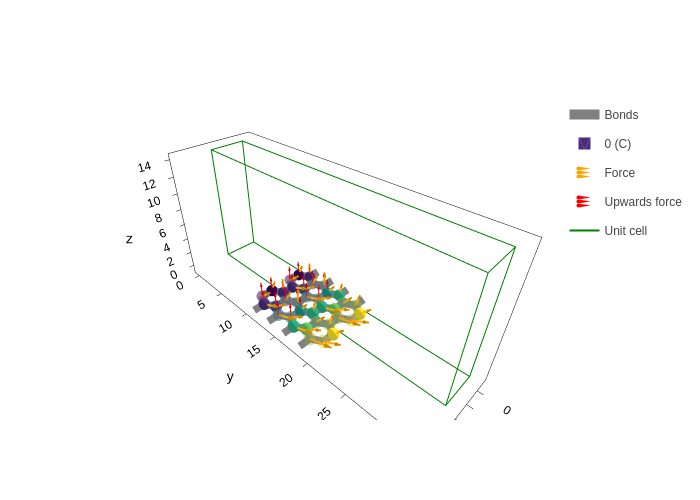

In [40]:
thumbnail_plot = plot

if thumbnail_plot:
    thumbnail_plot.show("png")

-------------